# **베스트 모델 만들기**
###  그래프로 확인한다.
- 딥러닝 프레임워크가 만들어 낸 모델을 업데이트 하는 과정이다.
- 이를 위해서는 에포크를 얼마나 지정할지 결정해야 한다.
- 모델의 학습시간에 따른 정확도와 테스트 결과를 그래프를 통해 확인한다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!pip install tensorflow==2.0

In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

Using TensorFlow backend.


In [0]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [5]:
df_pre = pd.read_csv('/content/drive/My Drive/Colab Notebooks/deep-learning-for-everyone/dataset/wine.csv', header=None)
df = df_pre.sample(frac=0.3) 
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
5316,6.3,0.18,0.24,3.4,0.053,20.0,119.0,0.99373,3.11,0.52,9.2,6,0
5210,6.8,0.14,0.18,1.4,0.047,30.0,90.0,0.99164,3.27,0.54,11.2,6,0
3518,7.3,0.22,0.50,13.7,0.049,56.0,189.0,0.99940,3.24,0.66,9.0,6,0
1622,7.6,0.67,0.14,1.5,0.074,25.0,168.0,0.99370,3.05,0.51,9.3,5,0
2443,7.3,0.21,0.29,1.6,0.034,29.0,118.0,0.99170,3.30,0.50,11.0,8,0


In [0]:
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

In [0]:
# 모델 설정
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

MODEL_DIR = '/content/drive/My Drive/Colab Notebooks/deep-learning-for-everyone/project/model/'
if not os.path.exists(MODEL_DIR):
   os.mkdir(MODEL_DIR)

# 모델 저장 조건
# checkpointer: 모니터할 값 지정. val_loss는 테스트 오차 (cf. acc: 학습 정확도, val_acc: 테스트 셋 정확도, loss: 학습 셋 오차)
# filepath를 modelpath로 지정. verbose: 1이면 해당 함수의 진행 사항 출력, 0이면 출력되지 않음.
# save_best_only: 앞서 저장한 모델보다 나아졌을 때만 저장
modelpath="/content/drive/My Drive/Colab Notebooks/deep-learning-for-everyone/project/model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1364/1364 [==============================] - 0s 20us/sample - loss: 0.0106 - accuracy: 0.9963 - val_loss: 0.0818 - val_accuracy: 0.9880
Epoch 502/3000
1364/1364 [==============================] - 0s 20us/sample - loss: 0.0103 - accuracy: 0.9971 - val_loss: 0.0769 - val_accuracy: 0.9915
Epoch 503/3000
1364/1364 [==============================] - 0s 21us/sample - loss: 0.0114 - accuracy: 0.9956 - val_loss: 0.0859 - val_accuracy: 0.9880
Epoch 504/3000
1364/1364 [==============================] - 0s 17us/sample - loss: 0.0108 - accuracy: 0.9963 - val_loss: 0.0772 - val_accuracy: 0.9915
Epoch 505/3000
1364/1364 [==============================] - 0s 19us/sample - loss: 0.0104 - accuracy: 0.9956 - val_loss: 0.0840 - val_accuracy: 0.9880
Epoch 506/3000
1364/1364 [==============================] - 0s 21us/sample - loss: 0.0105 - accuracy: 0.9963 - val_loss: 0.0815 - val_accuracy: 0.9897
Epoch 507/3000
1364/1364 [==============================] - 0s 20us/sampl

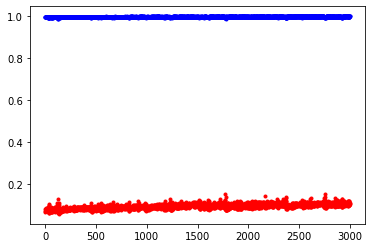

In [9]:
# 모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.3, epochs=3000, batch_size=500)

# y_vloss에 test set으로 실험한 결과의 오차 값
y_vloss=history.history['val_loss']

# acc-> accuracy, val_acc -> val_accuracy
# 출처: https://www.codesofinterest.com/2020/01/fixing-keyerror-acc-valacc-keras.html
# y_acc 에 train set으로 측정한 정확도의 값
y_acc=history.history['accuracy']

# x값을 지정하고 
# acc를 파란색으로, val_loss를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
653/653 [==============================] - 0s 28us/sample - loss: 0.0410 - accuracy: 0.9939 - val_loss: 0.0560 - val_accuracy: 0.9845
Epoch 1002/3500
653/653 [==============================] - 0s 30us/sample - loss: 0.0404 - accuracy: 0.9939 - val_loss: 0.0505 - val_accuracy: 0.9907
Epoch 1003/3500
653/653 [==============================] - 0s 33us/sample - loss: 0.0392 - accuracy: 0.9923 - val_loss: 0.0473 - val_accuracy: 0.9938
Epoch 1004/3500
653/653 [==============================] - 0s 34us/sample - loss: 0.0398 - accuracy: 0.9908 - val_loss: 0.0466 - val_accuracy: 0.9938
Epoch 1005/3500
653/653 [==============================] - 0s 38us/sample - loss: 0.0402 - accuracy: 0.9908 - val_loss: 0.0480 - val_accuracy: 0.9938
Epoch 1006/3500
653/653 [==============================] - 0s 34us/sample - loss: 0.0390 - accuracy: 0.9939 - val_loss: 0.0530 - val_accuracy: 0.9876
Epoch 1007/3500
653/653 [==============================] - 0s 34us/sample - loss

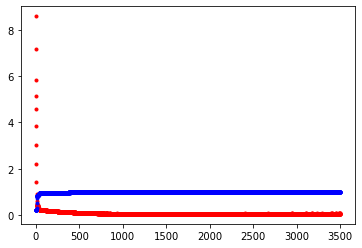

In [10]:
df = df_pre.sample(frac=0.15) 

dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

# 모델 설정
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

MODEL_DIR = '/content/drive/My Drive/Colab Notebooks/deep-learning-for-everyone/project/model/'
if not os.path.exists(MODEL_DIR):
   os.mkdir(MODEL_DIR)

# 모델 저장 조건
modelpath="/content/drive/My Drive/Colab Notebooks/deep-learning-for-everyone/project/model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# 모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500)

# y_vloss에 test set으로 실험한 결과의 오차 값
y_vloss=history.history['val_loss']

# acc-> accuracy, val_acc -> val_accuracy
y_acc=history.history['accuracy']

x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()

?